<a href="https://colab.research.google.com/github/mariiapronesti01/Ising-image-denoising/blob/main/denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0    #renormalize

Troppe immagini, selezioniamo solo 25 immagini casuali dal train set

In [97]:
np.random.seed(42)

# Select 25 random indices, too many images to run the code on all of them
random_indices = np.random.choice(len(X_train), size=25, replace=False)

# Extract the corresponding images
X_train = X_train[random_indices]

Visualizziamo le 25 immagini selezionate

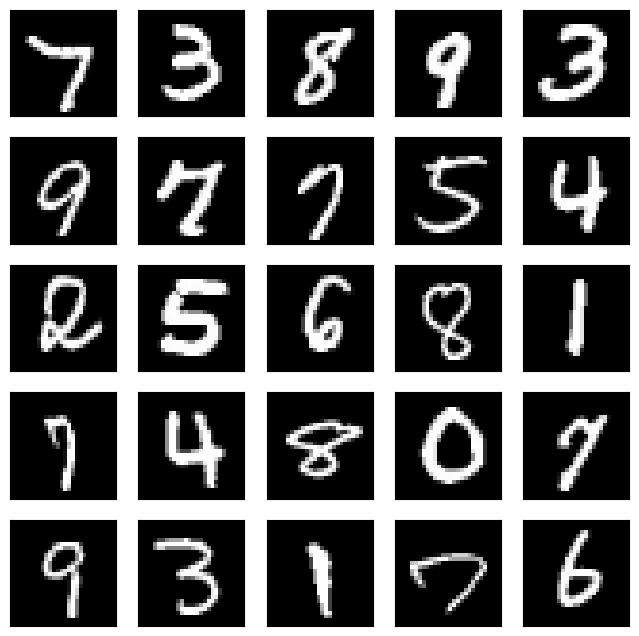

In [98]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap = plt.cm.gist_gray)
  plt.xticks([])
  plt.yticks([])

plt.show()

**Aggiungiamo rumore bianco**

`np.random.randn(*images.shape)` is used to sample values from a standard normal, while clip will ensure that all sampled values will stay in [0,1]

In [99]:
# Add random noise to the images
def add_noise(images, noise_level):
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0, 1)
    return noisy_images

noise_level = 0.2
noisy_X_train = add_noise(X_train, noise_level)

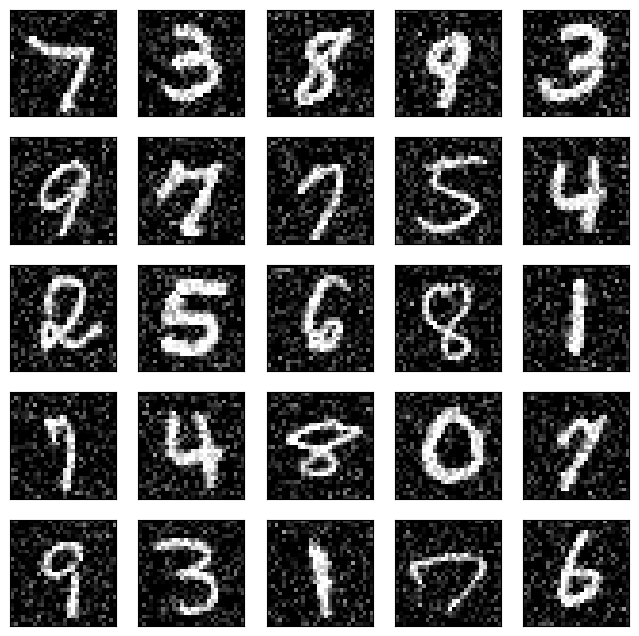

In [100]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(noisy_X_train[i], cmap = plt.cm.gist_gray )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [101]:
# Denoising using Gibbs sampling
def denoise_images(noisy_images, num_iterations):
    denoised_images = np.copy(noisy_images)
    num_samples, num_rows, num_cols = denoised_images.shape

    for i in range(num_iterations):
        for j in range(num_samples):
            for row in range(num_rows):
                for col in range(num_cols):
                    # Compute the energy of the current configuration
                    current_energy = -denoised_images[j, row, col] * noisy_images[j, row, col]

                    # Compute the energy of flipping the pixel
                    flipped_energy = denoised_images[j, row, col] * noisy_images[j, row, col]

                    # Compute the probability of flipping the pixel
                    p_flip = 1.0 / (1.0 + np.exp(current_energy - flipped_energy))

                    # Flip the pixel with the computed probability
                    denoised_images[j, row, col] = np.random.choice([denoised_images[j, row, col], -denoised_images[j, row, col]], p=[1 - p_flip, p_flip])

    return denoised_images

num_iterations = 100
denoised_X_train = denoise_images(noisy_X_train, num_iterations)


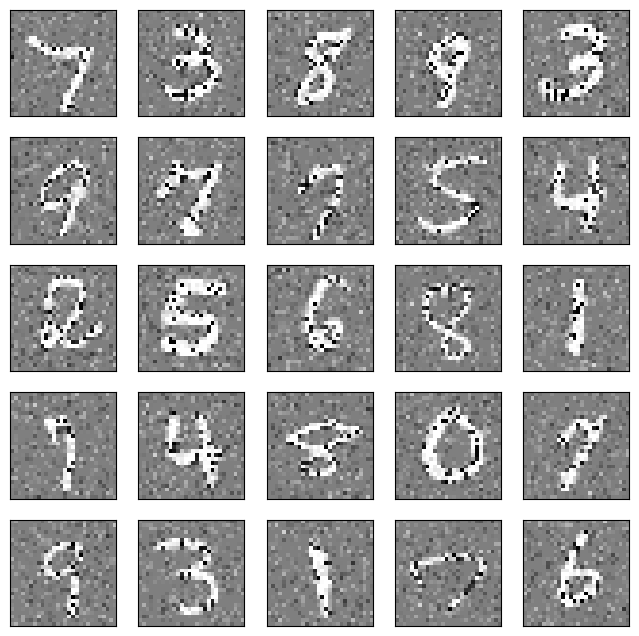

In [102]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(denoised_X_train[i], cmap = plt.cm.binary)    # if we put camp=plt.cm.binary it seems fine, but the original is cm.gist_gray
  plt.xticks([])
  plt.yticks([])

plt.show()